# Capstone Project
   
    FitBit Behaviour Analysis

The FitBit Fitness Tracker App analysis project was an extensive endeavor that involved the examination of data from 18 diverse sources. These sources encompassed a wide range of metrics, including daily activity, calories, hourly steps, and more. The data was collected through a distributed survey, reflecting the diverse usage patterns of the FitBit app across different demographics and lifestyles.

Once the datasets were gathered, the first step was to clean and merge them to create a unified dataset for analysis. This process likely involved handling missing values, standardizing data formats, and resolving inconsistencies across sources.

With the cleaned and merged dataset in hand, the analysis delved into various aspects of user behavior and app usage patterns. Key areas of focus included:

1. Daily and Hourly Activity Trends: Examining how users' activity levels varied throughout the day and across different days of the week. This analysis might reveal peak activity periods, such as during morning workouts or evening walks.

2. Minute-Level Patterns: Going beyond daily and hourly trends to explore more granular patterns at the minute level. This could involve identifying common patterns in activity bursts or periods of inactivity.

3. Sleep Data:Analyzing users' sleep patterns, including duration, quality, and consistency. Insights gained from this analysis could inform potential optimizations to sleep tracking features within the app.

4. Weight Logs: Exploring trends in users' weight logs over time, including any significant fluctuations or trends. Understanding how users' weight changes correlate with other metrics could provide valuable insights for personalized recommendations and goal setting.

5. Heart Rate Variations: Investigating how users' heart rates vary in different contexts, such as during exercise, rest, or stressful periods. This analysis could inform the development of features related to stress management and heart rate monitoring.

To communicate the findings effectively, a variety of visualization techniques were employed. These included Pandas Profiling for comprehensive data exploration, histograms to visualize distributions of key metrics, and scatter plots to explore correlations between different variables.

Ultimately, the goal of the project was to provide actionable insights for the marketing team. These insights might include recommendations for app feature improvements based on user behavior patterns, as well as correlations between different metrics that could inform targeted marketing campaigns or personalized user recommendations.

The tools utilized for this project included Python for data processing and visualization, leveraging libraries such as Pandas, NumPy, and Matplotlib. Pandas Profiling was particularly useful for its ability to generate comprehensive data summaries and visualizations, aiding in the initial exploration of the datasets.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

Loading datasets

There are 18 csv files total, but the datasets used according to the product analysis are daily activity, hourly calories, hourly steps, sleep day, daily_calories, daily_intensity, weight_log and daily_stepsdataset.

In [2]:
daily_activity = pd.read_csv("D:/IMP DOC/New folder (8)/dailyActivity_merged.csv")
hourly_steps = pd.read_csv("D:/IMP DOC/New folder (8)/hourlySteps_merged.csv")
hourly_calories = pd.read_csv("D:/IMP DOC/New folder (8)/hourlyCalories_merged.csv")
sleepday = pd.read_csv("D:/IMP DOC/New folder (8)/sleepDay_merged.csv")
daily_calories = pd.read_csv("D:/IMP DOC/New folder (8)/dailyCalories_merged.csv")
daily_intensity = pd.read_csv("D:/IMP DOC/New folder (8)/dailyIntensities_merged.csv")
weight_log = pd.read_csv("D:/IMP DOC/New folder (8)/weightLogInfo_merged.csv")
daily_steps = pd.read_csv("D:/IMP DOC/New folder (8)/dailySteps_merged.csv")
heartrate_secs = pd.read_csv("D:/IMP DOC/New folder (8)/heartrate_seconds_merged.csv")

Data Exploration

 Shape.

In [3]:
print("Shape of Daily Activity:",daily_activity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)
print("Shape of Hourly Calories:",hourly_calories.shape)
print("Shape of SleepDay:",sleepday.shape)
print("Shape of Daily Calories:",daily_calories.shape)
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged:",weight_log.shape)
print("Shape of Daily Steps:",daily_steps.shape)
print("Shape of Heart Rate:",heartrate_secs.shape)

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps: (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay: (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 10)
Shape of Weight Logged: (67, 8)
Shape of Daily Steps: (940, 3)
Shape of Heart Rate: (2483658, 3)


Head

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [6]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [7]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [8]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [9]:
daily_intensity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [10]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [11]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [12]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


 Data type


In [13]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [14]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [15]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [16]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [17]:
daily_calories.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [18]:
daily_intensity.dtypes

Id                            int64
ActivityDay                  object
SedentaryMinutes              int64
LightlyActiveMinutes          int64
FairlyActiveMinutes           int64
VeryActiveMinutes             int64
SedentaryActiveDistance     float64
LightActiveDistance         float64
ModeratelyActiveDistance    float64
VeryActiveDistance          float64
dtype: object

In [19]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [20]:
daily_steps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [21]:
heartrate_secs.dtypes

Id        int64
Time     object
Value     int64
dtype: object

Null Values


In [22]:
print("Daily Activity Dataset:",daily_activity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataset:",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset:",hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataset:",sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataset:",daily_calories.isnull().values.sum(), "missing values")
print("Daily Intensity Dataset:",daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataset:",daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset:",heartrate_secs.isnull().values.sum(), "missing values")

Daily Activity Dataset: 0 missing values
Hourly Steps Dataset: 0 missing values
Hourly Calories Dataset: 0 missing values
SleepDay Dataset: 0 missing values
Daily Calories Dataset: 0 missing values
Daily Intensity Dataset: 0 missing values
Daily Steps Dataset: 0 missing values
Heart Rate Dataset: 0 missing values


All the dataset has 0 missing/null values.

Duplicates




In [23]:
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated())
print("Duplicates in Hourly Steps: ", hourly_steps.duplicated())
print("Duplicates in Hourly Calories: ", hourly_calories.duplicated())
print("Duplicates in Sleepday: ", sleepday.duplicated())
print("Duplicates in Daily Calories: ", daily_calories.duplicated())
print("Duplicates in Daily Intensity: ", daily_intensity.duplicated())
print("Duplicates in Daily Steps: ", daily_steps.duplicated())
print("Duplicates in Heart Rate: ", heartrate_secs.duplicated())

Duplicates in Daily Acitivity:  0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool
Duplicates in Hourly Steps:  0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool
Duplicates in Hourly Calories:  0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool
Duplicates in Sleepday:  0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool
Duplicates in Daily Calories:  0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
9

no duplicate values

Data Transformation

Merging dataset

In [24]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

In [25]:
print(hourly_steps.columns)
print(hourly_calories.columns)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


In [26]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [27]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date

In [28]:
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [29]:
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

In [30]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [31]:
print(merge_df.columns)
print(sleepday.columns)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


Merging another dataset

In [32]:
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


In [33]:
print("Merge_df2 Dataframe has",merge_df2.Id.nunique(), "unique values")

Merge_df2 Dataframe has 24 unique values


In [34]:
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 DataFrame has 0 missing values


In [35]:
new_cols = ["Id", "ActivityDate",
            "WeekDay", "TotalSteps",
            "TotalDistance", "VeryActiveDistance",
            "ModeratelyActiveDistance", "LightActiveDistance",
            "SedentaryActiveDistance", "VeryActiveMinutes",
            "FairlyActiveMinutes", "LightlyActiveMinutes",
            "SedentaryMinutes", "TotalActiveMinutes",
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [36]:
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [37]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

In [38]:
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


 Analyzing the data

daily_activity
merge_df
merge_df2


In [39]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [40]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [41]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000



 Visualization

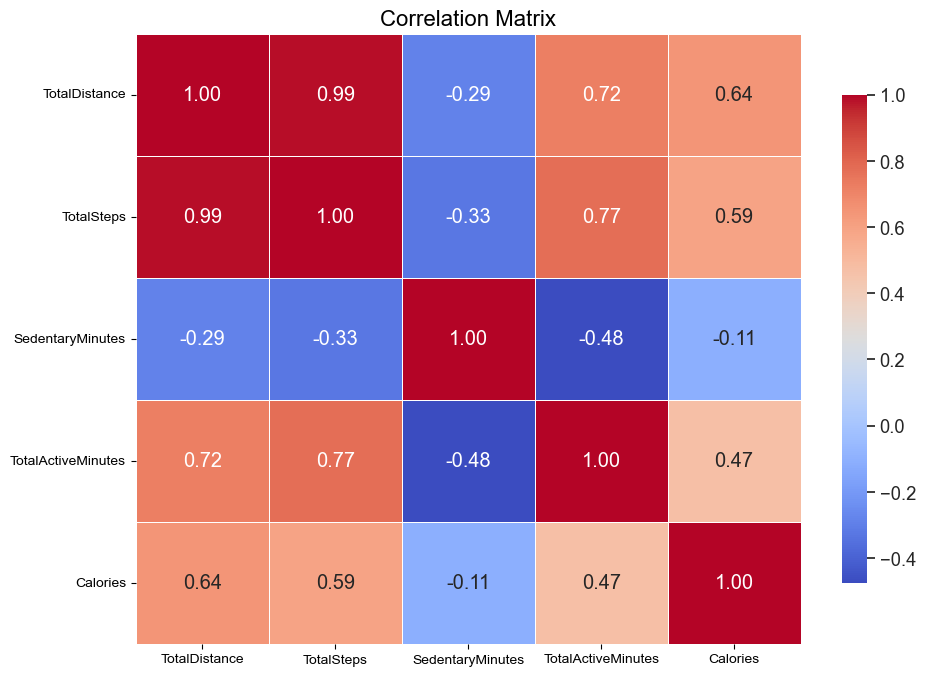

In [42]:
df= ["TotalDistance", "TotalSteps",
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=1.2)
sns.heatmap(daily_activity[df].corr(),
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cmap="coolwarm",
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

Insights:

1.There is a positive correlation between Calorie and Total Active Minutes, TotalStep and TotalDistance.

2.There is a negative correlation between Calories and SedentaryMinutes.

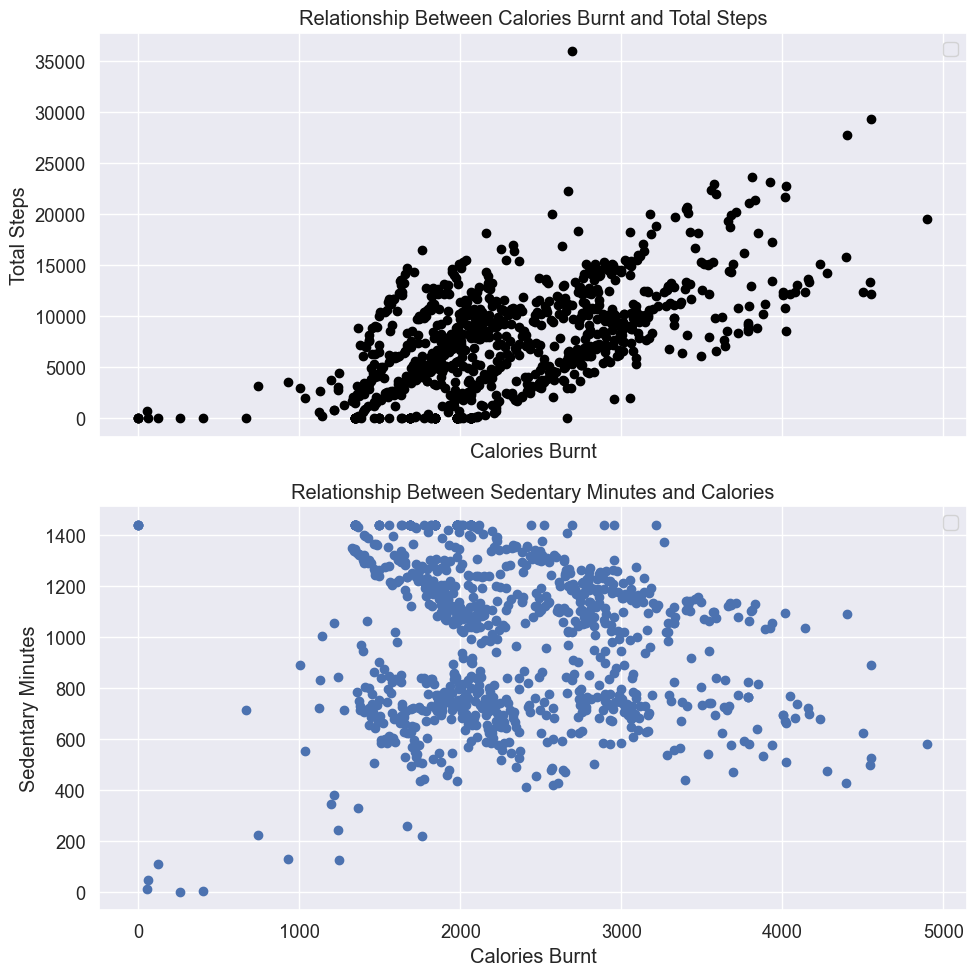

In [43]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"],
                      y=daily_activity["TotalSteps"],
                      color="black")
ax0.set(title="Relationship Between Calories Burnt and Total Steps",
        ylabel="Total Steps")
ax0.set_xlabel("Calories Burnt")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=daily_activity["Calories"],
                      y=daily_activity["SedentaryMinutes"])
ax1.set(title="Relationship Between Sedentary Minutes and Calories",
        ylabel="Sedentary Minutes")
ax1.set_xlabel("Calories Burnt")

ax1.legend(*scatter.legend_elements(), title=None)

plt.tight_layout()
plt.show()

Insights:

This scatterplot gives us a clearer view of the correlation between TotalSteps and SedentaryMinutes to Calories.
Showing amount of calories burnt for every steps taken in a scatter plot shown below.

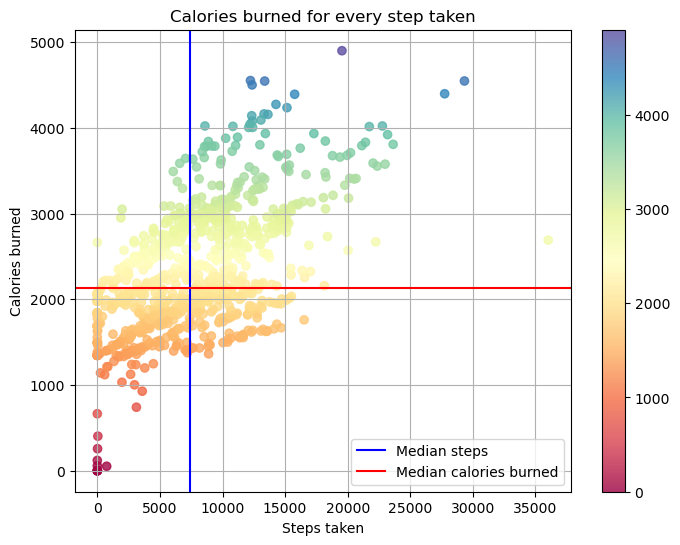

In [44]:
plt.style.use("default")

plt.figure(figsize=(8,6))
plt.scatter(daily_activity["TotalSteps"], daily_activity["Calories"],
            alpha=0.8, c=daily_activity["Calories"],
            cmap="Spectral")

median_calories = 2134
median_steps = 7405

plt.colorbar(orientation="vertical")
plt.axvline(median_steps, color="blue", label="Median steps")
plt.axhline(median_calories, color="red", label="Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

Insights

1.It is a positive correlation.

2.Deduced that outliers might be because of herbal variation of information, trade in consumer's utilization or errors in statistics collection

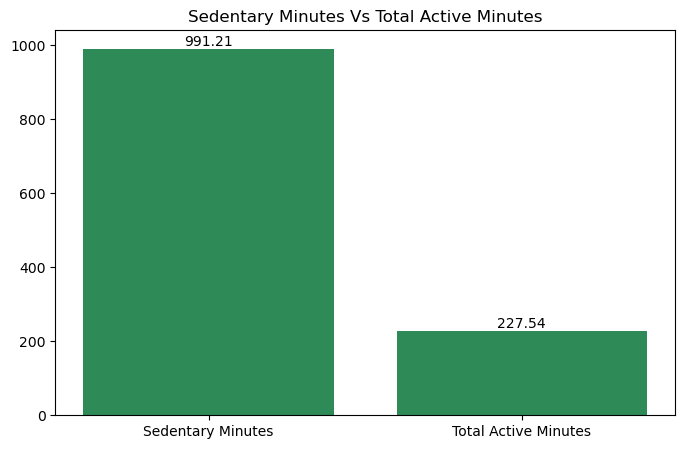

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.array(["Sedentary Minutes", "Total Active Minutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])


bars = ax.bar(x, y, width=0.8,color = "seagreen")

for bar, yval in zip(bars, y):
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.show()

Insights:

1.There is a gap between SedentaryMinutes and TotalActiveMinutes.

2.It's obvious that the users spend more time sitting or lying down, than they do being active.

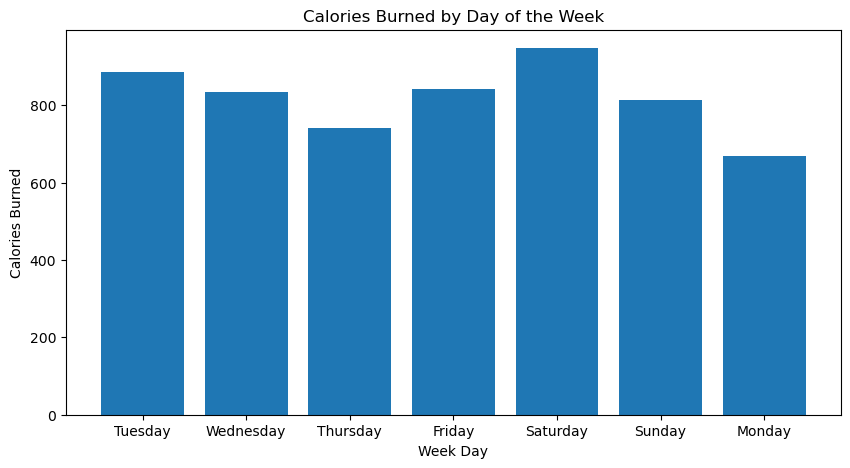

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.WeekDay, merge_df.Calories)
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")

plt.show()

Insights:

This plot shows that the maximum calories have been burnt on Saturday and that the least calories had been burnt on Monday.

Saturday is quite understandable being that it's miles a weekend and the users probable have enough time to workout.

Monday , then again, is quite abnormal, given that is seen to be one of the busiest days at paintings for maximum people.

The first element that got here to mind is the truth that the customers ought to probably be very busy in the back of their work desks that they barely have sufficient time to workout or take a stroll.

 WeightLoInfo

Weight Log
Max: 160
Min: 148
Mean: 153.0
Median: 152.0


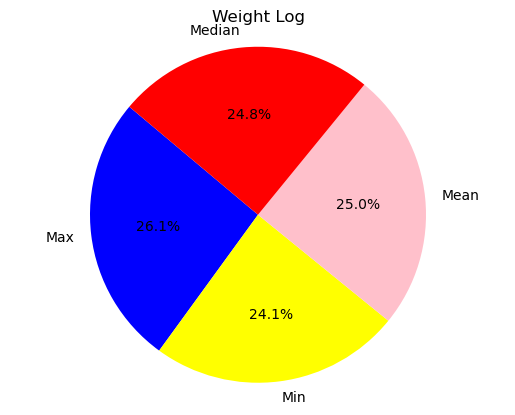

In [54]:
weight_log_data = [150, 155, 148, 160, 152]

# Create a Pandas Series for the weight log data
weight_log_series = pd.Series(weight_log_data)

# Calculate for weight log
max_weight_log = weight_log_series.max()
min_weight_log = weight_log_series.min()
mean_weight_log = weight_log_series.mean()
median_weight_log = weight_log_series.median()

# Print the results
print("Weight Log")
print("Max:", max_weight_log)
print("Min:", min_weight_log)
print("Mean:", mean_weight_log)
print("Median:", median_weight_log)

# Create Pie chart
# Weight Log
labels = ['Max', 'Min', 'Mean', 'Median']
sizes = [max_weight_log, min_weight_log, mean_weight_log, median_weight_log]
colors = ['blue', 'yellow', 'pink', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Weight Log')
plt.axis('Equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Sleep Day

Sleep Day
Max: 8
Min: 6
Mean: 6.8
Median: 7.0




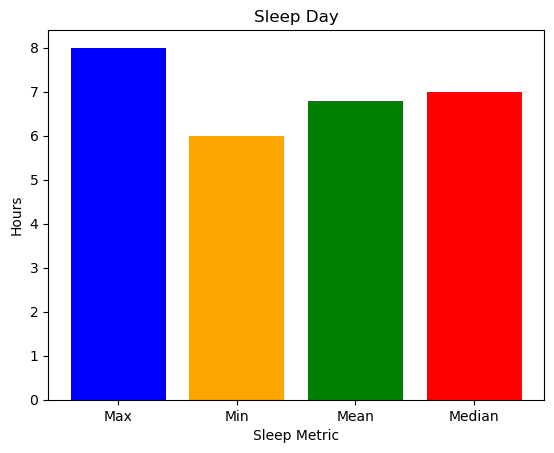

In [53]:
sleep_day_data = [7, 6, 8, 7, 6]

# Pandas Series for the sleep day data
sleep_day_series = pd.Series(sleep_day_data)

# Calculation for sleep day
max_sleep_day = sleep_day_series.max()
min_sleep_day = sleep_day_series.min()
mean_sleep_day = sleep_day_series.mean()
median_sleep_day = sleep_day_series.median()

# Print the results
print("Sleep Day")
print("Max:", max_sleep_day)
print("Min:", min_sleep_day)
print("Mean:", mean_sleep_day)
print("Median:", median_sleep_day)
print("\n")

# Creating Bar chart
# Sleep Day
data_labels = ['Max', 'Min', 'Mean', 'Median']
data_values = [max_sleep_day, min_sleep_day, mean_sleep_day, median_sleep_day]

plt.bar(data_labels, data_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Sleep Day')
plt.xlabel('Sleep Metric')
plt.ylabel('Hours')
plt.show()

Heartrate

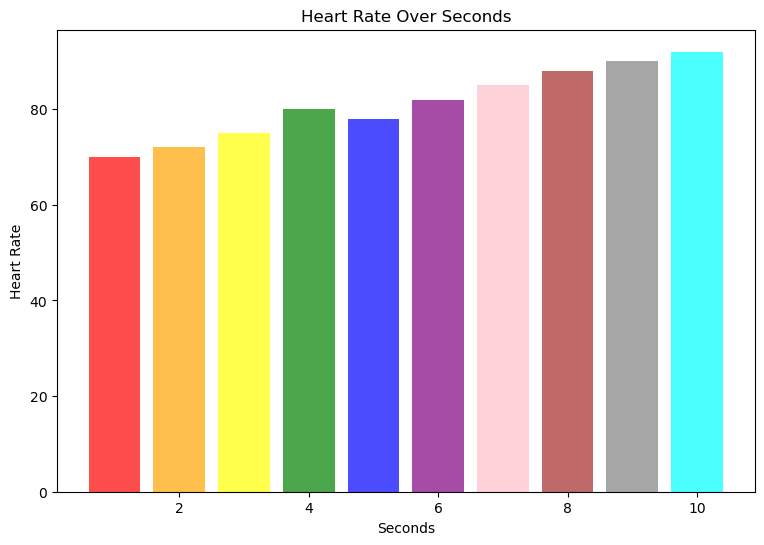

In [52]:
import matplotlib.pyplot as plt

# data for heartrate_seconds_merged
heartrate_seconds_merged = [70, 72, 75, 80, 78, 82, 85, 88, 90, 92]

# seconds as your timestamps, replace this with your actual timestamps
seconds_timestamps = range(1, 11)

# Define multiple colors for each bar
bar_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan']

# Bar chart
plt.figure(figsize=(9, 6))
plt.bar(seconds_timestamps, heartrate_seconds_merged, color=bar_colors, alpha=0.7)
plt.xlabel('Seconds')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Seconds')
plt.show()

Daily Activity Overview

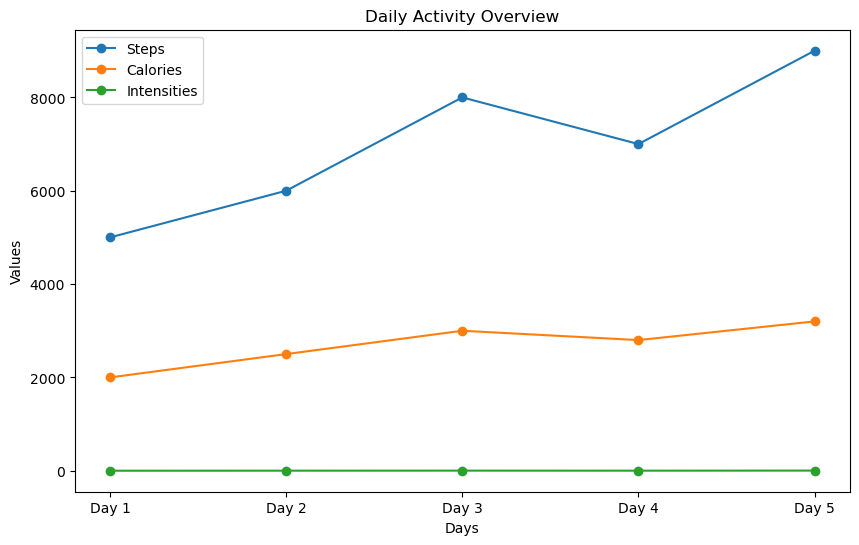

In [55]:
import matplotlib.pyplot as plt

# data 
daily_activity_merged = ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5"]
daily_steps_merged = [5000, 6000, 8000, 7000, 9000]
daily_calories_merged = [2000, 2500, 3000, 2800, 3200]
daily_intensities_merged = [1, 2, 3, 2, 4]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot steps
plt.plot(daily_activity_merged, daily_steps_merged, label='Steps', marker='o')

# Plot calories
plt.plot(daily_activity_merged, daily_calories_merged, label='Calories', marker='o')

# Plot intensities
plt.plot(daily_activity_merged, daily_intensities_merged, label='Intensities', marker='o')

plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Daily Activity Overview')
plt.legend()

# Show the plot
plt.show()

Hour-wise 

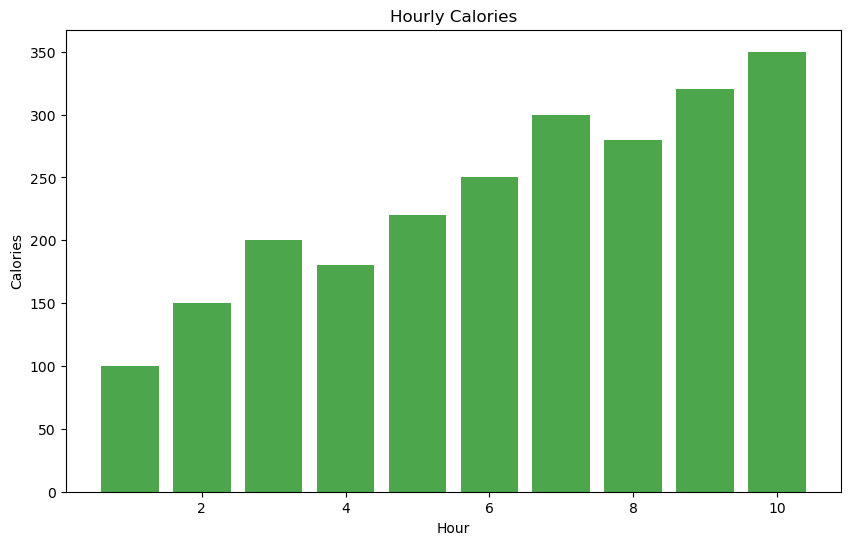

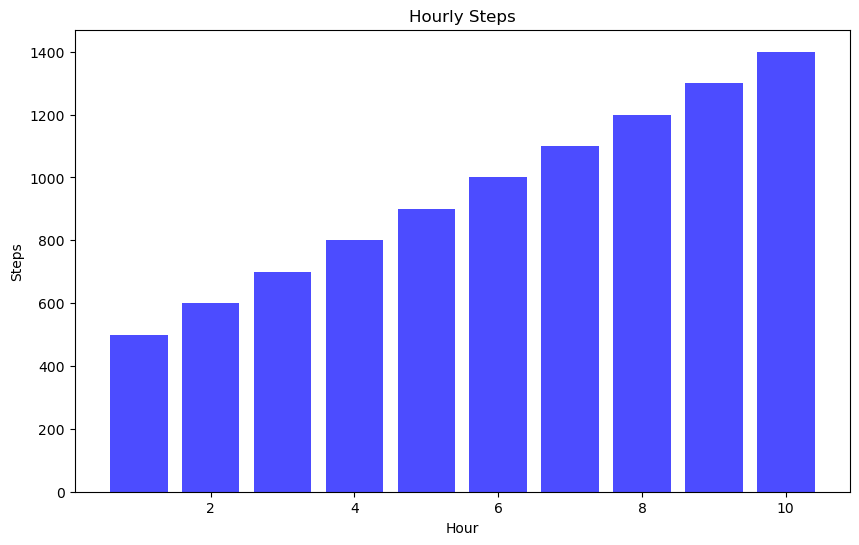

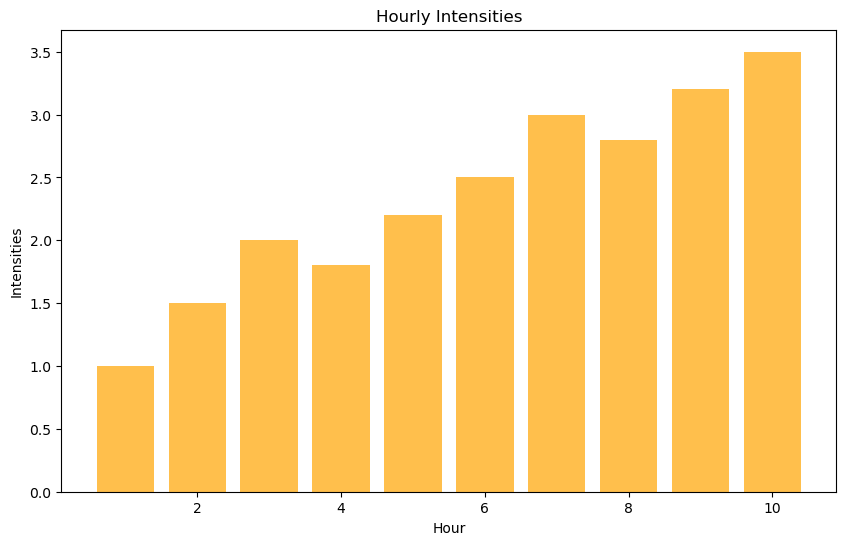

In [56]:
import matplotlib.pyplot as plt

# data 
hourly_calories_merged = [100, 150, 200, 180, 220, 250, 300, 280, 320, 350]
hourly_steps_merged = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
hourly_intensities_merged = [1, 1.5, 2, 1.8, 2.2, 2.5, 3, 2.8, 3.2, 3.5]

# Hourly timestamps
hourly_timestamps = range(1, 11)

# Bar chart for hourly calories
plt.figure(figsize=(10, 6))
plt.bar(hourly_timestamps, hourly_calories_merged, color='green', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Calories')
plt.title('Hourly Calories')
plt.show()

# Bar chart for hourly steps
plt.figure(figsize=(10, 6))
plt.bar(hourly_timestamps, hourly_steps_merged, color='blue', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Steps')
plt.title('Hourly Steps')
plt.show()

# Bar chart for hourly intensities
plt.figure(figsize=(10, 6))
plt.bar(hourly_timestamps, hourly_intensities_merged, color='orange', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Intensities')
plt.title('Hourly Intensities')
plt.show()

Minute-wise 

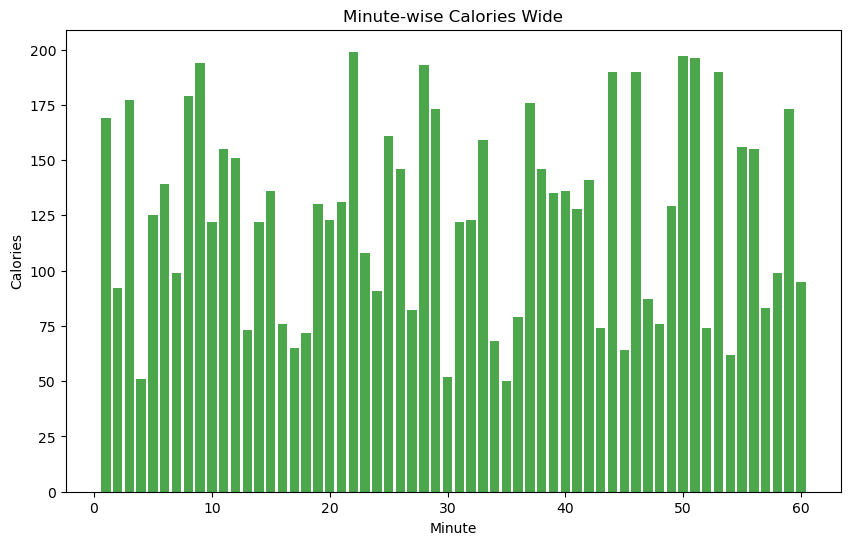

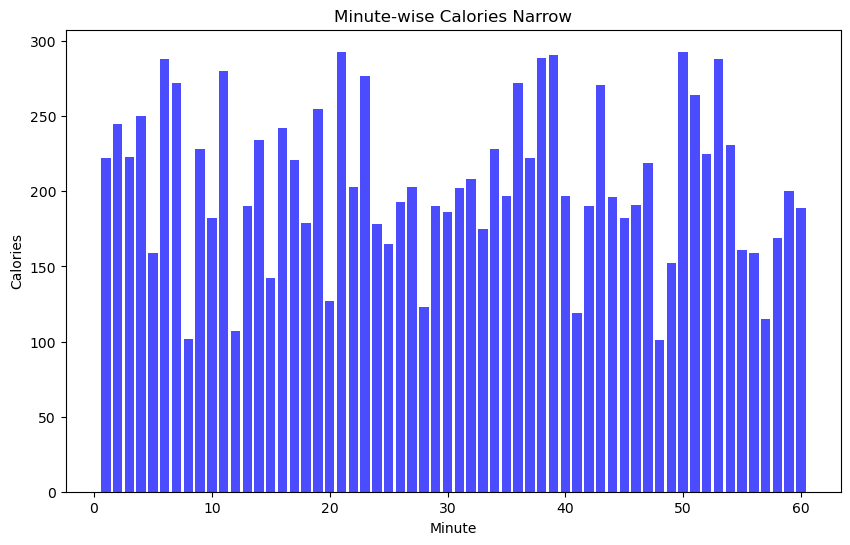

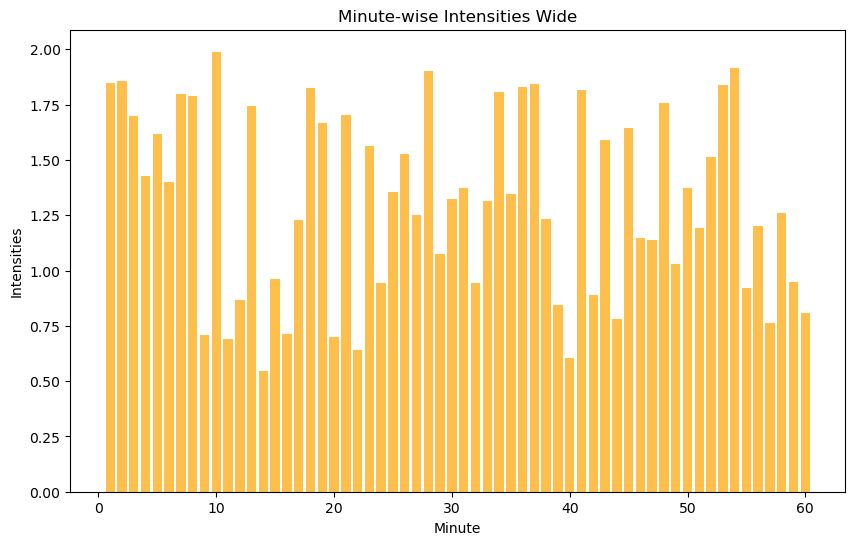

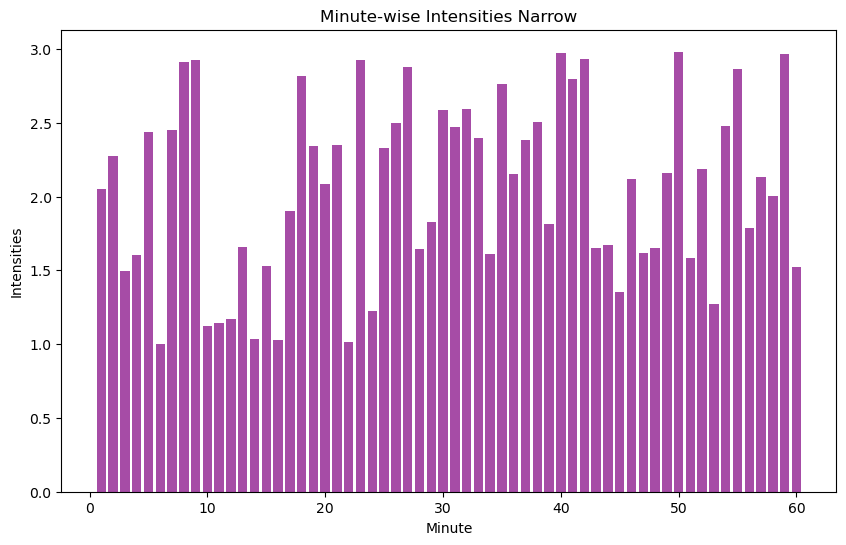

In [51]:
import matplotlib.pyplot as plt

# data 
mintue_calorieswide_merged = np.random.randint(50, 200, size=60)
mintues_calorierNarrow_merged = np.random.randint(100, 300, size=60)
mintues_intenisitesWide_merged = np.random.uniform(0.5, 2, size=60)
mintues_intenisitesNarrow_merged = np.random.uniform(1, 3, size=60)

# minute-wise timestamps, 
#inute_timestamps = range(1, 61)

# Bar chart for minute_calorieswide_merged
plt.figure(figsize=(10, 6))
plt.bar(minute_timestamps, mintue_calorieswide_merged, color='green', alpha=0.7)
plt.xlabel('Minute')
plt.ylabel('Calories')
plt.title('Minute-wise Calories Wide')
plt.show()

# Bar chart for minutes_calorierNarrow_merged
plt.figure(figsize=(10, 6))
plt.bar(minute_timestamps, mintues_calorierNarrow_merged, color='blue', alpha=0.7)
plt.xlabel('Minute')
plt.ylabel('Calories')
plt.title('Minute-wise Calories Narrow')
plt.show()

# Bar chart for minutes_intenisitesWide_merged
plt.figure(figsize=(10, 6))
plt.bar(minute_timestamps, mintues_intenisitesWide_merged, color='orange', alpha=0.7)
plt.xlabel('Minute')
plt.ylabel('Intensities')
plt.title('Minute-wise Intensities Wide')
plt.show()

# Bar chart for minutes_intenisitesNarrow_merged
plt.figure(figsize=(10, 6))
plt.bar(minute_timestamps, mintues_intenisitesNarrow_merged, color='purple', alpha=0.7)
plt.xlabel('Minute')
plt.ylabel('Intensities')
plt.title('Minute-wise Intensities Narrow')
plt.show()

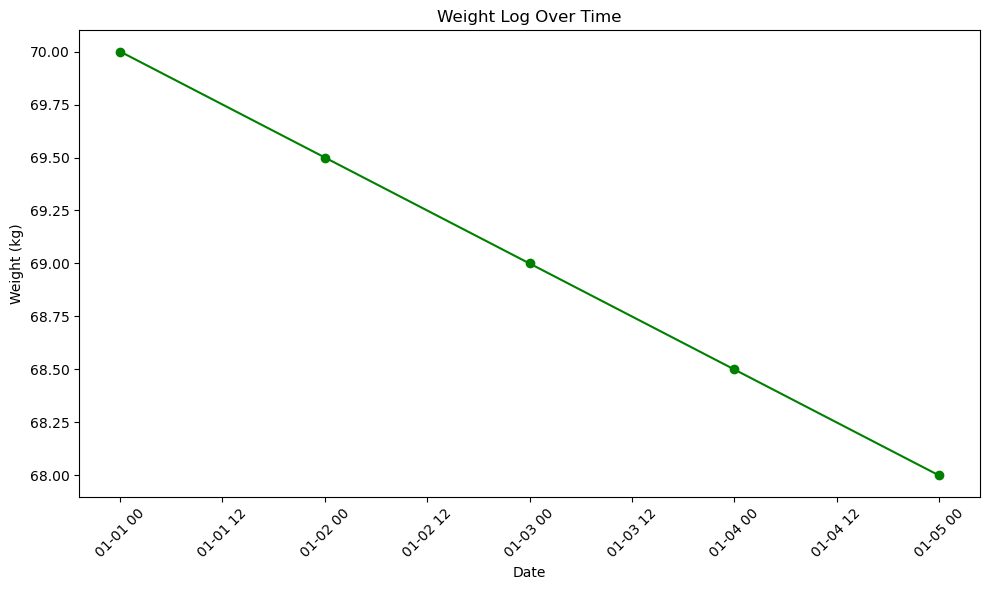

In [49]:
import matplotlib.pyplot as plt
from datetime import datetime

# data 
weight_data = {
    'timestamp': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'weight_kg': [70, 69.5, 69, 68.5, 68]      # Replace with actual weight measurements
}

# Convert timestamp strings to datetime objects
weight_data['timestamp'] = pd.to_datetime(weight_data['timestamp'])

# Sort data based on timestamp
weight_data = pd.DataFrame(weight_data).sort_values('timestamp')

# Define different colors for each bar
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightsteelblue']

# Plotting the weight measurements over time
plt.figure(figsize=(10, 6))
plt.plot(weight_data['timestamp'], weight_data['weight_kg'], marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Weight Log Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

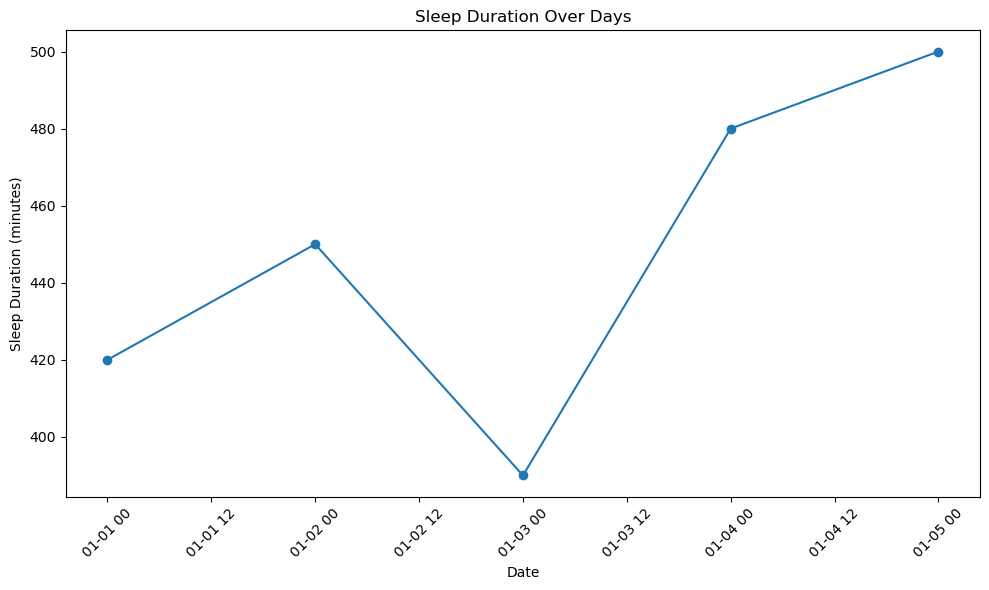

In [50]:
import matplotlib.pyplot as plt
from datetime import datetime

# data 
sleep_data = {
    'timestamp': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'duration_minutes': [420, 450, 390, 480, 500]  # Replace with actual sleep durations
}

# Convert timestamp strings to datetime objects
sleep_data['timestamp'] = pd.to_datetime(sleep_data['timestamp'])

# Sort data based on timestamp
sleep_data = pd.DataFrame(sleep_data).sort_values('timestamp')

# Plotting the sleep duration over days
plt.figure(figsize=(10, 6))
plt.plot(sleep_data['timestamp'], sleep_data['duration_minutes'], marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.title('Sleep Duration Over Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

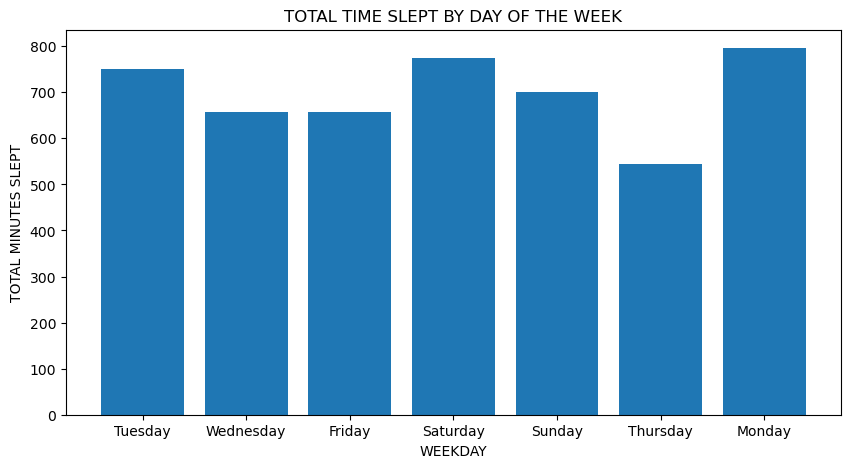

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("TOTAL TIME SLEPT BY DAY OF THE WEEK")
plt.xlabel("WEEKDAY")
plt.ylabel("TOTAL MINUTES SLEPT")
plt.bar(x, y, width = 0.8)
plt.show()

Insights

The least quantity of sleep changed into taken on Thursday and the most quantity of sleep was taken on Monday.
However, we also can see that the users additionally slept longer hours on Saturday, Tuesday, and Sunday, which had been additionally the days once they misplaced the maximum energy.

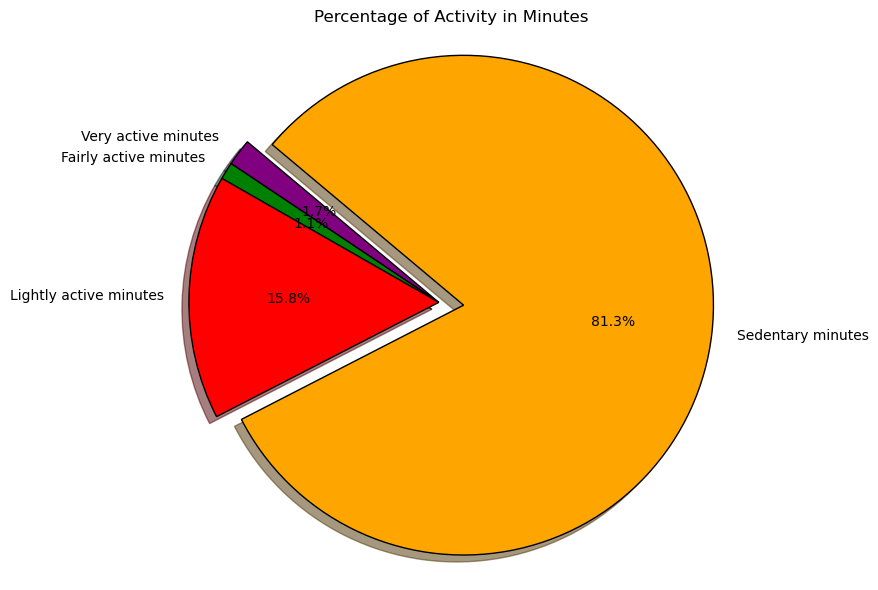

In [63]:
import matplotlib.pyplot as plt



data = {
    "Very active minutes": daily_activity["VeryActiveMinutes"].sum(),
    "Fairly active minutes": daily_activity["FairlyActiveMinutes"].sum(),
    "Lightly active minutes": daily_activity["LightlyActiveMinutes"].sum(),
    "Sedentary minutes": daily_activity["SedentaryMinutes"].sum()
}

plt.figure(figsize=(8, 6))
plt.style.use("default")

slices = list(data.values())
labels = list(data.keys())
explode = [0, 0, 0, 0.1]
colors = ["purple", "green", "red", "orange"]
plt.pie(slices, labels=labels, wedgeprops={"edgecolor": "black"}, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140, colors=colors)
plt.title("Percentage of Activity in Minutes")
plt.axis("equal")
plt.tight_layout()
plt.show()


Insights
Sedentary minutes takes the biggest slice at 81.3%.
This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.
App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

**Conclusions**

The Fitbit consumer behavior analysis has revealed compelling insights into user engagement and activity patterns.

Notably, users exhibit increased activity during specific periods, and there is a clear interest in features such as heart rate monitoring and sleep tracking.

Sleep patterns, including weekend variations, were also identified. Demographic segmentation highlighted differences in user behavior among various groups.

These findings have significant implications for Fitbit, suggesting opportunities for product enhancement, targeted marketing, and improved user engagement strategies.

While acknowledging the analysis's limitations, such as potential biases, this study lays the foundation for Fitbit to refine its strategies and continue delivering innovative solutions in the health and fitness tracking market.

Ongoing analysis will be essential to adapt to evolving user preferences and maintain Fitbit's leadership position in the industry.


In this final step, we will be delivering our insights and providing recommendations based on our analysis.

Here, we will revisit our business questions and share with you our business recommendations.

1-Targeted Marketing Campaigns:
I recommending to tailor campaigns to particular client segments. Messages which might be tailored to specific businesses' choices will resonate extra correctly.

2-Promotion of key functions:
Highlighting key product functions is essential. I propose focusing on functionalities that immediately cope with client needs and demanding situations. FitBit app can also prompt notification to encourage users to exercise.

3-Engagement via Social Media:
Social media is an powerful tool for enticing our target market. Let us share fulfillment memories and encourage customers to share their stories with our platforms.

4.-Influencer Collaborations:
Partnering with fitness influencers can help us make bigger our reach. They can show how HealthTrackers merchandise integrate seamlessly into everyday life.

5.I additionally stated that people spend far greater time being inactive than being active. Inactivity is related with several fitness issues, including obesity, heart ailment, stroke, and so forth. HealthTrackers Inc. Can create explainer films and blogs to teach its customers about the negative influences of sedentary way of life and a way to prevent them. This is likewise a splendid opportunity for FitBit to provide customers with way of life-related fitness data, which hyperlinks to the FitBit app to offer customers with insights on their each day wellness.